In [2]:
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt
# coords = np.array([[0,0], [1,0], [3,5], [10,20]])

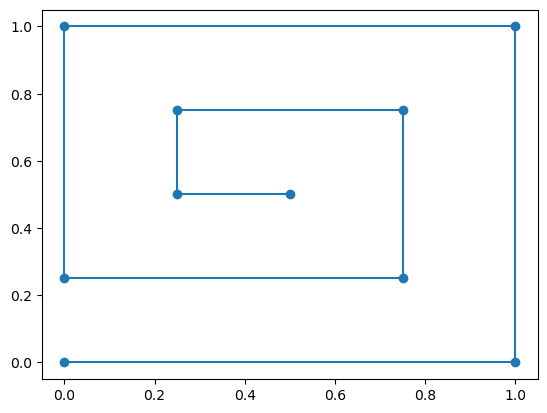

In [23]:
coords = np.array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.75, 0.25],
       [0.75, 0.75],
       [0.25, 0.75],
       [0.25, 0.5 ],
       [0.5 , 0.5 ]])
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
# np.zeros(coords.shape)

In [24]:
len(coords)

10

In [25]:
len([np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))])

9

In [50]:
# converts coordinate configuration into angles configuration
def coords2angle(coords): 
    thetas = []
    lengths = []
    for ind in range(len(coords)-1):
        edge = coords[ind+1] - coords[ind]
        length = np.linalg.norm(edge)
        lengths.append(length)
        theta = np.arccos(edge[0] / length)
        if edge[1] < 0:
            theta = 2 * np.pi - theta
        thetas.append(theta)
    return np.array(thetas), np.array(lengths)

In [23]:
# converts angles configuration back to coordinate configuration
import cmath
def angle2coords(angles, lengths):
    coords = [[0,0]]
    for ind in range(len(angles)):
        # Convert the complex number to a coord and offset it with the last coord
#         coord = [coords[ind][0] + np.real(coord), coords[ind][1] + np.imag(coord)]
        coord = [coords[ind][0] + lengths[ind] * np.cos(angles[ind]), 
                 coords[ind][1] + lengths[ind] * np.sin(angles[ind])]
        coords.append(coord)
    return np.array(coords)

In [28]:
# coords.size()

In [17]:
def gradient_term(wx, wy, vx, vy, ux, uy):
    g = np.array([[(-2*(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3, (-2*(-uy + wy)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vy + wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3],
[(2*(-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3, (2*(-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3],
[(2*(ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3, (2*(uy - vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(uy - wy)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3
]])
    return g

In [18]:
# computes `ENERGY` of a configuration and returns the gradient as well :)
def energy(coords):
    coords = np.array(coords)
    E = 0
    G = np.zeros(coords.shape)
    # Iterate through edges u,v
    for u_ind in range(len(coords)-1):
        u = coords[u_ind]
        v = coords[u_ind+1]
        edge = v - u
        # Iterate through vertices w not on the edge
        for w_ind in range(len(coords)):
            if w_ind==u_ind or w_ind==u_ind+1:
                continue
            w = coords[w_ind]
            # Add to the energy
            E+=1/(np.linalg.norm(u-w)+np.linalg.norm(v-w)-np.linalg.norm(u-v))**2
            # Add to the gradient
            g = gradient_term(w[0], w[1], v[0], v[1], u[0], u[1])
            G[w_ind, :] = G[w_ind, :] + g[0]
            G[u_ind + 1, :] = G[u_ind + 1, :] + g[1]
            G[u_ind, :] = G[u_ind, :] + g[2]
    return E,G

0 917.7081370405936 22.67072399729859
1 234.08735915165963 19.113759044142636
2 178.70617719197378 16.974796793145522
3 147.75037613714338 15.491118372277707
4 127.41876498004294 14.37893691450848
5 112.83540927062472 13.502863698461251
6 101.76730875864291 12.788445244101396
7 93.02786572671306 12.190701512428262
8 85.92119096581034 11.680562312966961
9 80.00920810649981 11.238256750756637
10 75.0009376858696 10.84978920151023
11 70.69478026941837 10.50492682111138
12 66.94621899487629 10.195985620406072
13 63.6486983038907 9.917064796564953
14 60.72177012478038 9.663545499254857
15 58.103457920497405 9.431752207977235
16 55.74517524552503 9.218717697486012
17 53.60824848109843 9.022016027890333
18 51.6614788885592 8.839641403208821
19 49.87939657002252 8.66991868639691
20 48.24098619581538 8.511436217400666
21 46.728741288670065 8.362994636293392
22 45.327951699583934 8.223567383472009
23 44.02615942983538 8.092269847508826
24 42.81273786882746 7.968335004679531
25 41.678562781662855

263 9.18896469830681 3.529024018681596
264 9.168861979481182 3.525313373276073
265 9.148894002348701 3.521625542105485
266 9.129059397414379 3.517960316756365
267 9.109356814199847 3.5143174914936246
268 9.089784920909734 3.5106968632163595
269 9.07034240410515 3.507098231414527
270 9.05102796838398 3.503521398126489
271 9.031840336068 3.499966167897418
272 9.012778246896433 3.496432347738513
273 8.993840457725986 3.492919747087039
274 8.975025742237063 3.4894281777671505
275 8.95633289064612 3.485957453951494
276 8.937760709423934 3.4825073921235434
277 8.919308021019615 3.4790778110407006
278 8.900973663590367 3.4756685316980866
279 8.882756490736682 3.4722793772930687
280 8.864655371243016 3.4689101731904306
281 8.846669188823578 3.465560746888258
282 8.82879684187342 3.4622309279844474
283 8.81103724322442 3.45892054814388
284 8.793389319906241 3.455629441066197
285 8.775852012911983 3.452357442454204
286 8.758424276968542 3.449104389982881
287 8.741105080311616 3.445870123268951
2

536 6.327168171659324 2.9863467670645596
537 6.321806987596015 2.985336118060337
538 6.316465793502905 2.984329560986558
539 6.311144490870371 2.983327077568859
540 6.305842981866521 2.9823286496489194
541 6.30056116933134 2.981334259183498
542 6.295298956770826 2.980343888243498
543 6.290056248351178 2.979357519013023
544 6.284832948893102 2.978375133788453
545 6.279628963866095 2.9773967149775276
546 6.274444199382885 2.9764222450984446
547 6.269278562193863 2.97545170677895
548 6.264131959681568 2.9744850827554585
549 6.259004299855288 2.9735223558721664
550 6.253895491345655 2.9725635090801816
551 6.248805443399342 2.9716085254366575
552 6.243734065873746 2.9706573881039477
553 6.238681269231872 2.969710080348741
554 6.233646964537057 2.968766585541241
555 6.228631063447931 2.9678268871543256
556 6.223633478213359 2.9668909687627303
557 6.218654121667431 2.965958814042228
558 6.213692907224489 2.9650304067688285
559 6.208749748874252 2.9641057308179817
560 6.203824561176965 2.96318

801 5.397182954699497 2.821947588592557
802 5.394988294195692 2.8216124135524208
803 5.3928006381709865 2.8212787999462616
804 5.390619964268499 2.8209467430877586
805 5.38844625023318 2.8206162383100235
806 5.386279473911219 2.820287280965496
807 5.384119613249444 2.8199598664258323
808 5.381966646294753 2.819633990081796
809 5.379820551193469 2.8193096473431565
810 5.377681306190808 2.8189868336385904
811 5.375548889630294 2.818665544415558
812 5.373423279953153 2.818345775140221
813 5.371304455697754 2.8180275212973247
814 5.369192395499064 2.8177107783901043
815 5.367087078088061 2.8173955419401726
816 5.3649884822911575 2.8170818074874333
817 5.362896587029698 2.8167695705899707
818 5.360811371319359 2.816458826823954
819 5.358732814269627 2.8161495717835323
820 5.356660895083216 2.8158418010807473
821 5.3545955930555875 2.8155355103454216
822 5.35253688757435 2.815230695225077
823 5.350484758118776 2.8149273513848265
824 5.348439184259254 2.8146254745072823
825 5.3464001456567445

1065 5.008589032749866 2.7764435527458122
1066 5.007689478895446 2.7764010348881083
1067 5.006793326182654 2.776359290101443
1068 5.005900566546677 2.7763183165201863
1069 5.005011191948796 2.7762781122841274
1070 5.004125194376283 2.7762386755384494
1071 5.003242565842229 2.7762000044337194
1072 5.002363298385516 2.776162097125847
1073 5.001487384070612 2.7761249517760795
1074 5.000614814987522 2.7760885665509716
1075 4.999745583251643 2.7760529396223603
1076 4.998879681003642 2.776018069167351
1077 4.998017100409386 2.7759839533682857
1078 4.9971578336597515 2.775950590412733
1079 4.996301872970598 2.7759179784934545
1080 4.995449210582618 2.775886115808391
1081 4.994599838761191 2.7758550005606373
1082 4.993753749796334 2.7758246309584265
1083 4.992910936002575 2.775795005215099
1084 4.992071389718808 2.77576612154909
1085 4.991235103308228 2.7757379781839013
1086 4.990402069158193 2.775710573348091
1087 4.9895722796801465 2.775683905275238
1088 4.988745727309473 2.775657972203933
1

1312 4.872957530356031 2.78548146597466
1313 4.87270368512414 2.7855839192942
1314 4.872451823091671 2.785686806865431
1315 4.872201940193644 2.785790127682728
1316 4.871954032374678 2.7858938807426035
1317 4.871708095588812 2.7859980650437306
1318 4.871464125799602 2.786102679586918
1319 4.871222118980009 2.7862077233751097
1320 4.870982071112385 2.7863131954133795
1321 4.870743978188458 2.7864190947089194
1322 4.870507836209258 2.786525420271044
1323 4.870273641185148 2.7866321711111666
1324 4.8700413891357215 2.7867393462428036
1325 4.869811076089796 2.786846944681568
1326 4.869582698085399 2.786954965445155
1327 4.869356251169698 2.7870634075533443
1328 4.869131731399005 2.7871722700279866
1329 4.868909134838712 2.7872815518929936
1330 4.868688457563253 2.7873912521743516
1331 4.86846969565614 2.787501369900088
1332 4.868252845209835 2.7876119041002827
1333 4.868037902325784 2.7877228538070558
1334 4.86782486311437 2.787834218054564
1335 4.867613723694879 2.7879459958789803
1336 4.

1577 4.864206412829132 2.8251088592448124
1578 4.864359538107969 2.8252966740522805
1579 4.864513821380208 2.8254847153328635
1580 4.864669260254047 2.825672982476711
1581 4.864825852341758 2.825861474875012
1582 4.864983595259719 2.8260501919199745
1583 4.865142486628383 2.82623913300484
1584 4.865302524072266 2.8264282975238544
1585 4.865463705219911 2.8266176848723017
1586 4.8656260277039385 2.826807294446467
1587 4.865789489160954 2.8269971256436532
1588 4.865954087231612 2.827187177862183
1589 4.8661198195605735 2.8273774505013813
1590 4.866286683796483 2.827567942961577
1591 4.8664546775919675 2.8277586546441174
1592 4.8666237986036665 2.827949584951342
1593 4.86679404449215 2.82814073328659
1594 4.866965412921952 2.828332099054207
1595 4.867137901561564 2.8285236816595245
1596 4.867311508083379 2.8287154805088766
1597 4.867486230163747 2.828907495009582
1598 4.867662065482915 2.8290997245699554
1599 4.8678390117250485 2.8292921685992907
1600 4.868017066578182 2.8294848265078745


1835 4.9359898011687395 2.879514839311303
1836 4.93637234014488 2.8797434179727235
1837 4.93675553126912 2.879972094491166
1838 4.937139372940171 2.8802008684634735
1839 4.937523863559067 2.88042973948712
1840 4.937909001529158 2.8806587071602134
1841 4.938294785256111 2.880887771081487
1842 4.938681213147902 2.881116930850311
1843 4.939068283614824 2.8813461860666774
1844 4.93945599506947 2.8815755363312108
1845 4.939844345926725 2.881804981245157
1846 4.940233334603778 2.882034520410391
1847 4.940622959520106 2.8822641534294133
1848 4.9410132190974805 2.8824938799053434
1849 4.941404111759951 2.8827236994419287
1850 4.9417956359338495 2.8829536116435364
1851 4.942187790047789 2.8831836161151525
1852 4.9425805725326395 2.8834137124623873
1853 4.942973981821567 2.8836439002914673
1854 4.943368016349978 2.883874179209238
1855 4.943762674555556 2.8841045488231614
1856 4.944157954878234 2.8843350087413198
1857 4.944553855760209 2.884565558572406
1858 4.944950375645917 2.8847961979257297
1

2103 5.057213225695381 2.9431196203144774
2104 5.057719918498904 2.943361832894393
2105 5.058226907265626 2.943604055376568
2106 5.058734190909607 2.9438462875002696
2107 5.059241768346559 2.9440885290052092
2108 5.05974963849378 2.944330779631553
2109 5.060257800270203 2.9445730391199056
2110 5.060766252596352 2.944815307211332
2111 5.06127499439438 2.9450575836473396
2112 5.061784024588041 2.945299868169881
2113 5.062293342102695 2.9455421605213585
2114 5.062802945865306 2.945784460444622
2115 5.063312834804447 2.9460267676829632
2116 5.063823007850284 2.946269081980122
2117 5.06433346393459 2.9465114030802835
2118 5.0648442019907405 2.946753730728074
2119 5.065355220953689 2.946996064668567
2120 5.065866519760004 2.947238404647276
2121 5.066378097347833 2.947480750410163
2122 5.066889952656928 2.947723101703627
2123 5.067402084628618 2.9479654582745107
2124 5.067914492205828 2.9482078198701
2125 5.068427174333067 2.948450186238115
2126 5.06894012995642 2.9486925571267264
2127 5.0694

2366 5.197714102591662 3.006464047755825
2367 5.198265758144858 3.006701139102171
2368 5.198817475113873 3.0069381859014745
2369 5.1993692527861555 3.007175187995897
2370 5.199921090450397 3.0074121452279403
2371 5.200472987396548 3.0076490574404406
2372 5.20102494291577 3.0078859244765717
2373 5.2015769563004906 3.008122746179839
2374 5.20212902684435 3.0083595223940933
2375 5.202681153842249 3.008596252963512
2376 5.20323333659031 3.0088329377326133
2377 5.203785574385894 3.0090695765462474
2378 5.2043378665276006 3.0093061692495957
2379 5.204890212315243 3.0095427156881813
2380 5.205442611049889 3.009779215707855
2381 5.205995062033818 3.0100156691548037
2382 5.206547564570548 3.0102520758755436
2383 5.207100117964817 3.0104884357169244
2384 5.207652721522592 3.0107247485261315
2385 5.208205374551064 3.0109610141506806
2386 5.208758076358654 3.011197232438415
2387 5.209310826254993 3.011433403237512
2388 5.209863623550947 3.0116695263964792
2389 5.210416467558586 3.0119056017641546


2625 5.340821863039111 3.0659889065562362
2626 5.3413689568404115 3.0662100845145828
2627 5.341915965630691 3.066431187265219
2628 5.3424628889799095 3.066652214725526
2629 5.343009726458947 3.0668731668131417
2630 5.343556477639661 3.0670940434459366
2631 5.3441031420948155 3.067314844542035
2632 5.344649719398139 3.067535570019798
2633 5.345196209124276 3.0677562197978334
2634 5.345742610848816 3.0679767937949953
2635 5.346288924148292 3.068197291930378
2636 5.346835148600166 3.068417714123318
2637 5.347381283782823 3.0686380602933943
2638 5.347927329275591 3.0688583303604333
2639 5.3484732846587315 3.0690785242444942
2640 5.349019149513424 3.0692986418658847
2641 5.349564923421786 3.0695186831451484
2642 5.350110605966853 3.0697386480030784
2643 5.350656196732605 3.069958536360696
2644 5.351201695303927 3.0701783481392715
2645 5.351747101266638 3.070398083260313
2646 5.352292414207479 3.0706177416455684
2647 5.352837633714118 3.0708373232170207
2648 5.3533827593751315 3.071056827896

2865 5.468827773726478 3.116757652499431
2866 5.469344126532829 3.1169589250579897
2867 5.469860315647427 3.1171601088759076
2868 5.470376340835211 3.1173612039202356
2869 5.470892201861797 3.117562210158197
2870 5.471407898493481 3.117763127557192
2871 5.471923430497263 3.11796395608478
2872 5.472438797640806 3.118164695708696
2873 5.472953999692464 3.118365346396846
2874 5.473469036421273 3.1185659081173025
2875 5.473983907596949 3.118766380838304
2876 5.474498612989877 3.1189667645282637
2877 5.475013152371136 3.119167059155753
2878 5.475527525512463 3.1193672646895214
2879 5.476041732186289 3.119567381098482
2880 5.476555772165712 3.1197674083517137
2881 5.4770696452245025 3.119967346418466
2882 5.477583351137107 3.1201671952681487
2883 5.47809688967864 3.120366954870347
2884 5.478610260624898 3.120566625194801
2885 5.479123463752325 3.12076620621143
2886 5.479636498838062 3.1209656978903064
2887 5.480149365659895 3.1211651002016754
2888 5.480662063996293 3.1213644131159444
2889 5.

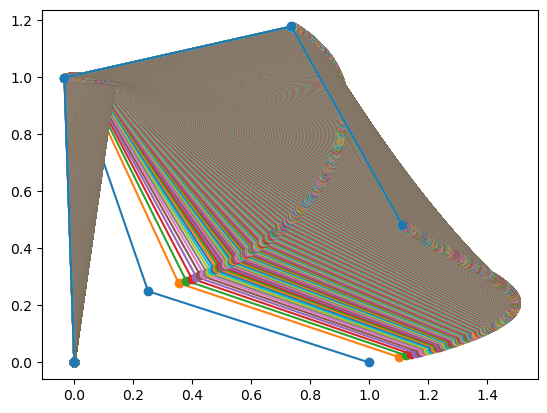

In [68]:
def gradient_descent(coords, stepsize = 0.01):
    e, gradient = energy(coords)
    new_coords = coords - stepsize * gradient # / np.linalg.norm(gradient)
    return new_coords, gradient

coords = np.array([[0,0],[0,1],[1/4,1/4],[1,0]])
# coords = np.array([[0.  , 0.  ],
#        [1.  , 0.  ],
#        [1.  , 1.  ],
#        [0.  , 1.  ],
#        [0.  , 0.25],
#        [0.75, 0.25],
#        [0.75, 0.75],
#        [0.25, 0.75],
#        [0.25, 0.5 ],
#        [0.5 , 0.5 ]])

correct_lens = [np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))]

plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

i = 0
e = 999999
while i<3000:
    tolerance = 0.01
#     print(i)
    coords, gradient = gradient_descent(coords, stepsize=0.0001)
    if i>5 and energy(coords)[0] - e > 0.1:
        print('e increased!')
        break
    else:
        e = energy(coords)[0]
    angs, lens = coords2angle(coords)
    coords = angle2coords(angs, correct_lens)
#     if i % 100 == 0:
    plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
    print(f"{i} {np.linalg.norm(gradient)}", end=" ")
    print(energy(coords)[0])
    i += 1
    if np.linalg.norm(gradient) < tolerance:
        break

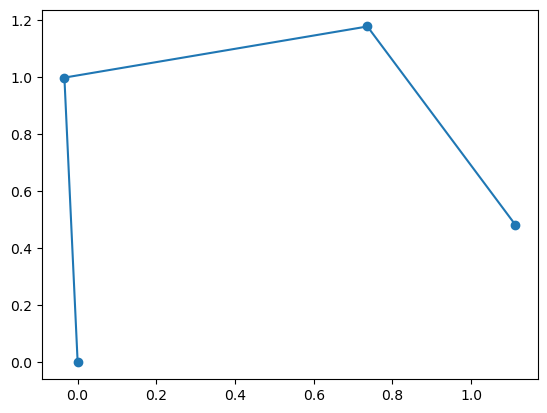

In [69]:
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

In [66]:
energy(coords)

(627.8611337294412,
 array([[  -41.07240206,   273.9272623 ],
        [ -422.15520132,   137.44648458],
        [ -378.41204059, -1444.41866017],
        [ -447.61654454, -2369.63445415],
        [  126.28609294,   105.36841242],
        [  -12.93648918,   -13.07359822],
        [  199.6350406 ,   783.97096783],
        [  204.90965386,  2763.79180463],
        [  -55.1500358 ,   -31.8236571 ],
        [  826.51192608,  -205.55456213]]))

In [ ]:
if 3:
    print("hi")

In [9]:
coords2angle(coords)

NameError: name 'coords' is not defined

[[ 0.          0.        ]
 [ 1.07620358 -0.06938063]
 [ 1.0742753   1.09380148]
 [-0.04788701  1.10946413]
 [-0.05259222  0.19243564]
 [ 0.6725983   0.21966914]
 [ 0.70517309  0.70891485]
 [ 0.33439717  0.75005272]
 [ 0.28352454  0.56871845]
 [ 0.43966624  0.53683564]]
[[ 0.          0.        ]
 [ 1.07620358 -0.06938063]
 [ 1.0742753   1.09380148]
 [-0.04788701  1.10946413]
 [-0.05259222  0.19243564]
 [ 0.6725983   0.21966914]
 [ 0.70517309  0.70891485]
 [ 0.33439717  0.75005272]
 [ 0.28352454  0.56871845]
 [ 0.43966624  0.53683564]]
[6.21880645 1.57245409 3.127636   4.7072581  0.03753595 1.5043128
 3.03109382 4.43887391 6.08176274]
[6.21880645 1.57245409 3.127636   4.7072581  0.03753595 1.5043128
 3.03109382 4.43887391 6.08176274]
[[ 0.          0.        ]
 [ 1.07620358 -0.06938063]
 [ 1.0742753   1.09380148]
 [-0.04788701  1.10946413]
 [-0.05259222  0.19243564]
 [ 0.6725983   0.21966914]
 [ 0.70517309  0.70891485]
 [ 0.33439717  0.75005272]
 [ 0.28352454  0.56871845]
 [ 0.43966624

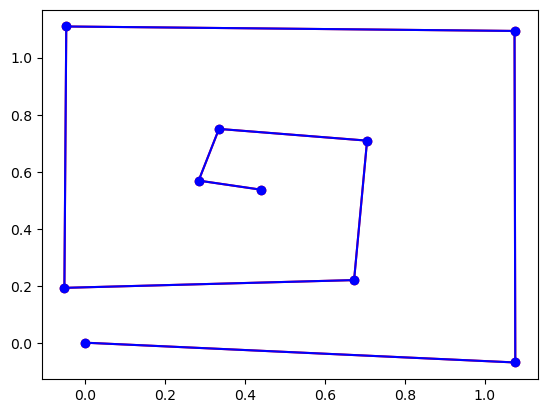

In [51]:
print(coords)
for i in range(coords.shape[0]):
    coords[i] -= coords[0]
print(coords)
angles, lengths = coords2angle(coords)
print(angles)
new_coords = angle2coords(angles, lengths)
new_angles, _ = coords2angle(new_coords)
print(new_angles)
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], 'r-o')
plt.plot([i[0] for i in new_coords[:]],[i[1] for i in new_coords[:]], 'b-o')
print(new_coords, np.linalg.norm(new_coords, 1))

In [67]:
from sympy import *
from sympy.vector import gradient
init_printing()

In [68]:
wx, wy, vx, vy, ux, uy = symbols('wx wy vx vy ux uy ', real = True)
w = Matrix([wx, wy])
v = Matrix([vx, vy])
u = Matrix([ux, uy])
expr = ((w-v).norm(2) + (w-u).norm(2) - (v-u).norm(2))**2
exp = 1/expr
# gradient(exp)
l = [wx, wy, vx, vy, ux, uy ]
for var in l:
    print(diff(exp,var))

(-2*(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3
(-2*(-uy + wy)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vy + wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3
(2*(-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3
(2*(-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3
(2*(ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - 